In [ ]:
# nanonisxarray Example: Reading Nanonis Data Files
# This notebook demonstrates how to load and analyze .3ds, .sxm, and .dat files

from nanonisxarray import Grid, Scan, Spectrum, GetData, FindData
from matplotlib import pyplot as plt
import numpy as np

# nanonisxarray Example Notebook

This notebook demonstrates how to use the `nanonisxarray` library to:
1. Load **grid spectroscopy** files (`.3ds`)
2. Load **scan/topography** files (`.sxm`) 
3. Load **point spectroscopy** files (`.dat`)
4. Access header metadata and signal channels
5. Work with the resulting xarray datasets

## Setup

First, update the `DATA_DIR` variable below to point to your Nanonis data folder.

In [ ]:
# =============================================================================
# CONFIGURATION: Update these paths to your data location
# =============================================================================

# Option 1: Specify a single file directly
GRID_FILE = "/path/to/your/file.3ds"   # Grid spectroscopy file
SCAN_FILE = "/path/to/your/file.sxm"   # Scan/topography file  
SPEC_FILE = "/path/to/your/file.dat"   # Point spectroscopy file

# Option 2: Specify a directory to search for files
DATA_DIR = "/path/to/your/data/folder"

## 1. Loading Grid Spectroscopy Files (.3ds)

Grid files contain spectroscopy data measured on a 2D grid of points. Each pixel contains a full spectrum (e.g., dI/dV vs bias voltage).

In [ ]:
# Load a grid spectroscopy file
# The Grid class automatically parses the header and converts data to xarray
grid = Grid(GRID_FILE)

# Print basic info
print(f"File: {grid.basename}")
print(f"Grid dimensions: {grid.header['dim_px']}")
print(f"Number of sweep points: {grid.header['num_sweep_signal']}")

reading /Volumes/T7 Shield/DropboxExcerpts/Trancata/JTDataAnalysis/2019/2019-09-23/1.2K/NbS2003.3ds failed


In [ ]:
# View the parsed header (experimental parameters)
print("=== Parsed Header ===")
for key, value in grid.header.items():
    print(f"  {key}: {value}")

AttributeError: 'Grid' object has no attribute 'header_raw2'

In [ ]:
# List available signal channels
print("=== Available Signal Channels ===")
for key in grid.signals.keys():
    if hasattr(grid.signals[key], 'shape'):
        print(f"  {key}: shape = {grid.signals[key].shape}")
    else:
        print(f"  {key}: {type(grid.signals[key])}")

AttributeError: 'Grid' object has no attribute 'signals'

In [ ]:
# Access the xarray Dataset - this is the recommended way to work with the data
print("=== xarray Dataset ===")
print(grid.ds)

# The dataset has coordinates for x, y (pixel indices) and the sweep signal (e.g., bias)

(256, 256, 200)

In [ ]:
# Plot the topography (Z height at each grid point)
fig, ax = plt.subplots(figsize=(6, 5))

# The 'topo' signal contains the Z-controller height at each pixel
topo = grid.signals['topo']
im = ax.imshow(topo, cmap='afmhot', origin='lower')
ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_title('Grid Topography')
plt.colorbar(im, ax=ax, label='Z (m)')
plt.tight_layout()
plt.show()

AttributeError: 'Grid' object has no attribute 'signals'

(256, 256, 200)


Text(0, 0.5, 'OC D1 X (m)')

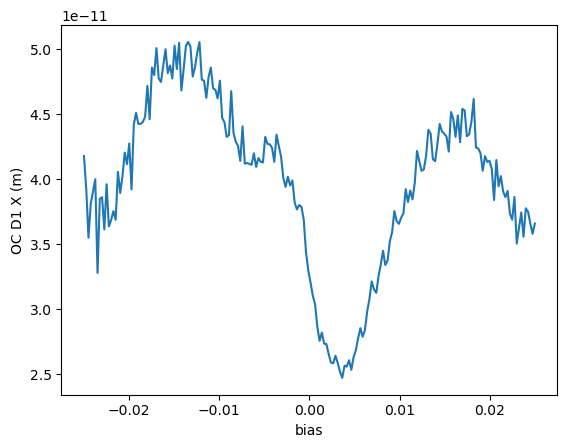

In [ ]:
# Plot a single spectrum from the grid
# Pick a pixel location (adjust indices based on your grid size)
ix, iy = grid.header['dim_px'][0] // 2, grid.header['dim_px'][1] // 2

fig, ax = plt.subplots(figsize=(8, 5))

# Get the sweep signal (typically bias voltage)
bias = grid.signals['sweep_signal']

# Plot the first available spectroscopy channel
# Common channels: 'Current (A)', 'OC D1 X (m)' (lock-in dI/dV)
spec_channels = [k for k in grid.signals.keys() if k not in ['sweep_signal', 'topo', 'params']]
if spec_channels:
    channel = spec_channels[0]
    spectrum = grid.signals[channel][ix, iy, :]
    ax.plot(bias, spectrum, 'b-', linewidth=1)
    ax.set_xlabel('Bias (V)')
    ax.set_ylabel(channel)
    ax.set_title(f'Spectrum at pixel ({ix}, {iy})')
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show()

## 2. Loading Scan Files (.sxm)

Scan files contain topography and other channel images recorded during a raster scan. Each channel has forward and backward scan directions.

In [ ]:
# Load a scan file
# Uncomment and update the path to test with your data
# scan = Scan(SCAN_FILE)
# 
# print(f"Scan size: {scan.header['scan_pixels']} pixels")
# print(f"Scan range: {scan.header['scan_range']} m")
# print(f"Bias: {scan.header['bias']} V")
# 
# # List available channels
# print("\nAvailable channels:")
# for ch in scan.signals.keys():
#     print(f"  {ch}")

# Example: Plot Z topography (forward and backward)
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 
# z_fwd = scan.signals['Z']['forward']
# z_bwd = scan.signals['Z']['backward']
# 
# im1 = axes[0].imshow(z_fwd, cmap='afmhot', origin='lower')
# axes[0].set_title('Z Forward')
# plt.colorbar(im1, ax=axes[0])
# 
# im2 = axes[1].imshow(z_bwd, cmap='afmhot', origin='lower')
# axes[1].set_title('Z Backward')
# plt.colorbar(im2, ax=axes[1])
# 
# plt.tight_layout()
# plt.show()

## 3. Loading Point Spectroscopy Files (.dat)

Point spectroscopy files contain spectra measured at a single location. These are ASCII-formatted files with header metadata.

In [ ]:
# Load a point spectrum file
# Uncomment and update the path to test with your data
# spec = Spectrum(SPEC_FILE)
# 
# print("Available channels:")
# for ch, data in spec.signals.items():
#     print(f"  {ch}: {len(data)} points")
# 
# # Plot the spectrum
# fig, ax = plt.subplots(figsize=(8, 5))
# 
# # Get the sweep signal (first column, usually bias)
# x_channel = list(spec.signals.keys())[0]
# y_channel = list(spec.signals.keys())[1]  # Second channel (e.g., Current)
# 
# ax.plot(spec.signals[x_channel], spec.signals[y_channel])
# ax.set_xlabel(x_channel)
# ax.set_ylabel(y_channel)
# ax.set_title('Point Spectrum')
# plt.tight_layout()
# plt.show()

## 4. Batch Processing: Finding Multiple Files

Use `GetData.find_data()` to search a directory for Nanonis files and optionally load them all.

In [ ]:
# Find all files of a given type in a directory
# Uncomment to test with your data

# Find .3ds grid files (returns list of file paths)
# grid_files = GetData.find_data(topdir=DATA_DIR, ext='3ds', get_data=False)
# print(f"Found {len(grid_files)} grid files:")
# for f in grid_files[:5]:  # Show first 5
#     print(f"  {f}")

# Load all grid files (returns list of Grid objects)
# grids = GetData.find_data(topdir=DATA_DIR, ext='3ds', get_data=True)
# print(f"\nLoaded {len(grids)} grid files")

# Find scan files
# scan_files = GetData.find_data(topdir=DATA_DIR, ext='sxm', get_data=False)
# print(f"Found {len(scan_files)} scan files")

## 5. Working with xarray Datasets

The `Grid` and `Scan` classes convert data to `xarray.Dataset` objects, which provide powerful labeled array operations.

In [ ]:
# xarray provides powerful labeled array operations
# Here are some common operations with grid data:

# Assuming 'grid' is loaded from above:
# ds = grid.ds

# Select data at a specific bias value
# ds.sel(bias=0.05, method='nearest')

# Average spectrum over all spatial points
# avg_spectrum = ds.mean(dim=['x', 'y'])

# Select a spatial slice at fixed bias
# spatial_map = ds.sel(bias=0.1, method='nearest')

# Integrate spectrum over a bias range
# integrated = ds.sel(bias=slice(-0.1, 0.1)).sum(dim='bias')

# Save to NetCDF for later use
# ds.to_netcdf('processed_data.nc')

# Load previously saved data
# import xarray as xr
# ds_loaded = xr.open_dataset('processed_data.nc')

print("See xarray documentation for more: https://docs.xarray.dev/")